In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('One hot Encoding_carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [7]:
from IPython.display import display, HTML
display(HTML('<h1> Using pandas to display dummy values for Car model</h1>'))

In [13]:
dummies = pd.get_dummies(df['Car Model'])
# dummies
# Here for each model - BMW, AUDI, MERCEDEZ - one binary value will be filled 
# So we merge df (original dataframe ) with dummies (car models) so that we get respective car model
merged = pd.concat([df,dummies],axis='columns')
# merged
# Finally we remove the car model "key", because we got the binaries for each model
final = merged.drop(['Car Model'], axis='columns')
final
# Summary : wherever BMW is marked 1, there it refers to each model of the car 
# with respective mileage and sell price and Age 

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [22]:
display(HTML('<h1> Dummy Trap Variable</h1>'))
display(HTML("""<h5> When you can derive one variable from other variables, 
they are known to be multi-colinear. Here if you know values of BMW 
and AUDI then you can easily infer value of new MERCEDEZ state, 
i.e. BMW = 0 and AUDI = 0. There for these state variables 
are called to be multi-colinear. In this situation linear regression 
won't work as expected. Hence you need to drop one column.
NOTE: sklearn library takes care of dummy variable trap hence even 
if you don't drop one of the state columns it is going to work, 
however we should make a habit of taking care of dummy variable 
trap ourselves just in case library that you are using is 
not handling this for you</h5>"""))

In [29]:
# final = final.drop(['Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [27]:
display(HTML('<h1>Now We can get X [ input values ] and output value Y [ price ] </h1>'))

In [98]:
X = final.drop(['Sell Price($)'], axis='columns')
# X = df[['Car Model','Mileage', 'Age(yrs)']].values
X
y = dfle['Sell Price($)'].values  
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [99]:
# importing linearRegression model from 1 file -> linear_regression_predict_salary_of_employees.ipynb
import joblib
model_= joblib.load("model_joblib")
# model_
model_.fit(X,y)


LinearRegression()

In [100]:
model_.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [101]:
display(HTML('<h1>  Score of our model </h1>'))
model_.score(X,y)

0.9417050937281082

In [102]:
model_.predict([[70000,2,0,1]])  
# We predicted model price  for BMW car having mileage of 70000, 2 years old which is 23665

C:\Users\tushar.m\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23664.96478046])

In [52]:
display(HTML('<h1>  1) Predict price of a mercedez benz that is 4 yr old with mileage 45000</h1>'))

model_.predict([[45000,4,0,0]])

C:\Users\tushar.m\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [54]:

display(HTML('<h1> 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000 </h1>'))

model_.predict([[86000,7,0,1]])

C:\Users\tushar.m\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [70]:
display(HTML('<h1> SECOND WAY to do One Hot Encoding - without creating dummies </h1>'))

In [82]:
# Using sklearn OneHotEncoder
# First step is to use label encoder to convert town names into numbers

df  
from sklearn.preprocessing import LabelEncoder  
# will automatically mark numeric order number for each brand
# AUDI - 0, BMW - 1,  MERCEDEZ - 2
le = LabelEncoder()

dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [111]:
X = dfle[['Car Model','Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [112]:
y = dfle['Sell Price($)'].values  
y


array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [131]:
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [115]:
model_.fit(X,y)

LinearRegression()

In [141]:
model_.score(X,y)

# Predict price of a BMW X5 that is 7 yr old with mileage 86000
model_.predict([[2,45000,4]])

array([33336.7721827])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [142]:
display(HTML('<h1> Its necessary to Split data into Train and Test !</h1>'))

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

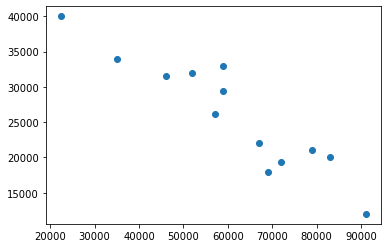

In [155]:
display(HTML("""
<h3> The approach we are going to use here is to split available data in two sets
Training:</br> We will train our model on this dataset
Testing: We will use this subset to make actual predictions using trained model </br></br>
The reason we don't use same training set for testing is because our model has seen those 
samples before, using same samples for making predictions might give us wrong impression 
about accuracy of our model. It is like you ask same questions in exam paper as you 
tought the students in the class.</h3>
"""))
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [162]:
# X,y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)  ## Splitting into 70:30 ratio
X_train,X_test, y_train, y_test

(array([[    2, 67000,     6],
        [    1, 46000,     4],
        [    2, 83000,     7],
        [    0, 91000,     8],
        [    0, 72000,     6],
        [    0, 52000,     5],
        [    1, 35000,     3],
        [    2, 79000,     7],
        [    0, 59000,     5]], dtype=int64),
 array([[    1, 57000,     5],
        [    2, 59000,     5],
        [    1, 22500,     2],
        [    1, 69000,     6]], dtype=int64),
 array([22000, 31500, 20000, 12000, 19300, 32000, 34000, 21000, 29400],
       dtype=int64),
 array([26100, 33000, 40000, 18000], dtype=int64))

In [168]:
# Lets run linear regression model now
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)   # new model = clf
X_test

array([[    1, 57000,     5],
       [    2, 59000,     5],
       [    1, 22500,     2],
       [    1, 69000,     6]], dtype=int64)

In [167]:
clf.predict(X_test)

array([27674.52023331, 26938.62008522, 40863.42288978, 22999.62223095])

In [169]:
clf.score(X_test, y_test)

0.7558837613551568

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

array([[    1, 22500,     2],
       [    0, 72000,     6],
       [    2, 79000,     7],
       [    0, 52000,     5]], dtype=int64)